# --- Day 9: Movie Theater ---
You slide down the firepole in the corner of the playground and land in the North Pole base movie theater!

The movie theater has a big tile floor with an interesting pattern. Elves here are redecorating the theater by switching out some of the square tiles in the big grid they form. Some of the tiles are red; the Elves would like to find the largest rectangle that uses red tiles for two of its opposite corners. They even have a list of where the red tiles are located in the grid (your puzzle input).

For example:
```
7,1
11,1
11,7
9,7
9,5
2,5
2,3
7,3
```
Showing red tiles as # and other tiles as ., the above arrangement of red tiles would look like this:
```
..............
.......#...#..
..............
..#....#......
..............
..#......#....
..............
.........#.#..
..............
```
You can choose any two red tiles as the opposite corners of your rectangle; your goal is to find the largest rectangle possible.

For example, you could make a rectangle (shown as O) with an area of 24 between 2,5 and 9,7:
```
..............
.......#...#..
..............
..#....#......
..............
..OOOOOOOO....
..OOOOOOOO....
..OOOOOOOO.#..
..............
```
Or, you could make a rectangle with area 35 between 7,1 and 11,7:
```
..............
.......OOOOO..
.......OOOOO..
..#....OOOOO..
.......OOOOO..
..#....OOOOO..
.......OOOOO..
.......OOOOO..
..............
```
You could even make a thin rectangle with an area of only 6 between 7,3 and 2,3:
```
..............
.......#...#..
..............
..OOOOOO......
..............
..#......#....
..............
.........#.#..
..............
```
Ultimately, the largest rectangle you can make in this example has area 50. One way to do this is between 2,5 and 11,1:
```
..............
..OOOOOOOOOO..
..OOOOOOOOOO..
..OOOOOOOOOO..
..OOOOOOOOOO..
..OOOOOOOOOO..
..............
.........#.#..
..............
```
Using two red tiles as opposite corners, what is the largest area of any rectangle you can make?

Please summarize the assignment for me.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at this Advent of Code puzzle, here's what you need to do:

**The Problem:**
You have a grid with red tiles at specific coordinates. Your goal is to find the **largest rectangle** where two red tiles form opposite corners (like top-left and bottom-right, or top-right and bottom-left).

**Key Points:**
- You're given a list of coordinates for red tiles (like `7,1` and `11,1`)
- You need to consider all possible pairs of red tiles
- For each pair, calculate the rectangle area between them
- The area is simply: `|x2 - x1| × |y2 - y1|`
- Find the maximum area possible

**Example:**
In the sample input with 8 red tiles, the largest rectangle has area **50** (between tiles at positions `2,5` and `11,1`, which gives `(11-2) × (5-1) = 9 × 5 = 45`... wait, let me recalculate: `10 × 5 = 50` ✓).

So essentially: check all pairs of red tiles, calculate rectangle areas, return the maximum.

Would you like help thinking through the approach to solve this, or do you want to try coding it yourself first?

In [ ]:
from fastcore.utils import L
from aocd import get_data

inp = get_data(day=9, year=2025)
samp = '''7,1
11,1
11,7
9,7
9,5
2,5
2,3
7,3
'''
samp

'7,1\n11,1\n11,7\n9,7\n9,5\n2,5\n2,3\n7,3\n'

In [ ]:
xs = samp.splitlines()
xs

['7,1', '11,1', '11,7', '9,7', '9,5', '2,5', '2,3', '7,3']

In [ ]:
x = xs[0]
x

'7,1'

In [ ]:
tuple(L(x.split(',')).map(int))

(7, 1)

In [ ]:
def parse_line(x):
    return tuple(L(x.split(',')).map(int))
parse_line(x)

(7, 1)

In [ ]:
def parse(s):
    xs = s.splitlines()
    return L(xs).map(parse_line)
ps = parse(samp)
ps

[(7, 1), (11, 1), (11, 7), (9, 7), (9, 5), (2, 5), (2, 3), (7, 3)]

How can I generate all possible combinations? Which python function can I use?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

For generating all possible pairs of points, you can use `itertools.combinations`. 

Here's how it works:

```python
from itertools import combinations

# This gives you all pairs (combinations of 2 items)
pairs = combinations(ps, 2)
```

The `combinations(iterable, r)` function returns all possible combinations of `r` items from your iterable, without repetition and where order doesn't matter (so you get `(a, b)` but not `(b, a)`).

Since you want pairs of red tiles to form rectangle corners, `combinations(ps, 2)` is exactly what you need!

Have you tried using it yet, or would you like to see what the output looks like?

In [ ]:
from itertools import combinations

# This gives you all pairs (combinations of 2 items)
pairs = list(combinations(ps, 2))
pairs

[((7, 1), (11, 1)),
 ((7, 1), (11, 7)),
 ((7, 1), (9, 7)),
 ((7, 1), (9, 5)),
 ((7, 1), (2, 5)),
 ((7, 1), (2, 3)),
 ((7, 1), (7, 3)),
 ((11, 1), (11, 7)),
 ((11, 1), (9, 7)),
 ((11, 1), (9, 5)),
 ((11, 1), (2, 5)),
 ((11, 1), (2, 3)),
 ((11, 1), (7, 3)),
 ((11, 7), (9, 7)),
 ((11, 7), (9, 5)),
 ((11, 7), (2, 5)),
 ((11, 7), (2, 3)),
 ((11, 7), (7, 3)),
 ((9, 7), (9, 5)),
 ((9, 7), (2, 5)),
 ((9, 7), (2, 3)),
 ((9, 7), (7, 3)),
 ((9, 5), (2, 5)),
 ((9, 5), (2, 3)),
 ((9, 5), (7, 3)),
 ((2, 5), (2, 3)),
 ((2, 5), (7, 3)),
 ((2, 3), (7, 3))]

In [ ]:
def area(c1, c2):
    x1, y1 = c1
    x2, y2 = c2
    return (abs(x2 - x1) + 1) * (abs(y2 - y1) + 1)
area((2, 5), (11, 1))

50

In [ ]:
pairs = list(combinations(ps, 2))
pairs

[((7, 1), (11, 1)),
 ((7, 1), (11, 7)),
 ((7, 1), (9, 7)),
 ((7, 1), (9, 5)),
 ((7, 1), (2, 5)),
 ((7, 1), (2, 3)),
 ((7, 1), (7, 3)),
 ((11, 1), (11, 7)),
 ((11, 1), (9, 7)),
 ((11, 1), (9, 5)),
 ((11, 1), (2, 5)),
 ((11, 1), (2, 3)),
 ((11, 1), (7, 3)),
 ((11, 7), (9, 7)),
 ((11, 7), (9, 5)),
 ((11, 7), (2, 5)),
 ((11, 7), (2, 3)),
 ((11, 7), (7, 3)),
 ((9, 7), (9, 5)),
 ((9, 7), (2, 5)),
 ((9, 7), (2, 3)),
 ((9, 7), (7, 3)),
 ((9, 5), (2, 5)),
 ((9, 5), (2, 3)),
 ((9, 5), (7, 3)),
 ((2, 5), (2, 3)),
 ((2, 5), (7, 3)),
 ((2, 3), (7, 3))]

In [ ]:
L(pairs).starmap(area)

[5, 35, 21, 15, 30, 18, 3, 7, 21, 15, 50, 30, 15, 3, 9, 30, 50, 25, 3, 24, 40, 15, 8, 24, 9, 3, 18, 6]

In [ ]:
max(L(pairs).starmap(area))

50

Wrap this into a function.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a function that wraps your solution:

```python
def solve(s):
    ps = parse(s)
    pairs = combinations(ps, 2)
    return max(L(pairs).starmap(area))
```

Note that I removed the `list()` call since you can iterate over `combinations` directly without converting it to a list first.

Would you like to test it with the sample data and then try it on your actual input?

In [ ]:
def solve(s):
    ps = parse(s)
    pairs = combinations(ps, 2)
    return max(L(pairs).starmap(area))
solve(samp)

50

In [ ]:
solve(inp)

4737096935

# --- Part Two ---
The Elves just remembered: they can only switch out tiles that are red or green. So, your rectangle can only include red or green tiles.

In your list, every red tile is connected to the red tile before and after it by a straight line of green tiles. The list wraps, so the first red tile is also connected to the last red tile. Tiles that are adjacent in your list will always be on either the same row or the same column.

Using the same example as before, the tiles marked X would be green:
```
..............
.......#XXX#..
.......X...X..
..#XXXX#...X..
..X........X..
..#XXXXXX#.X..
.........X.X..
.........#X#..
..............
```
In addition, all of the tiles inside this loop of red and green tiles are also green. So, in this example, these are the green tiles:
```
..............
.......#XXX#..
.......XXXXX..
..#XXXX#XXXX..
..XXXXXXXXXX..
..#XXXXXX#XX..
.........XXX..
.........#X#..
..............
```
The remaining tiles are never red nor green.

The rectangle you choose still must have red tiles in opposite corners, but any other tiles it includes must now be red or green. This significantly limits your options.

For example, you could make a rectangle out of red and green tiles with an area of 15 between 7,3 and 11,1:
```
..............
.......OOOOO..
.......OOOOO..
..#XXXXOOOOO..
..XXXXXXXXXX..
..#XXXXXX#XX..
.........XXX..
.........#X#..
..............
```
Or, you could make a thin rectangle with an area of 3 between 9,7 and 9,5:
```
..............
.......#XXX#..
.......XXXXX..
..#XXXX#XXXX..
..XXXXXXXXXX..
..#XXXXXXOXX..
.........OXX..
.........OX#..
..............
```
The largest rectangle you can make in this example using only red and green tiles has area 24. One way to do this is between 9,5 and 2,3:
```
..............
.......#XXX#..
.......XXXXX..
..OOOOOOOOXX..
..OOOOOOOOXX..
..OOOOOOOOXX..
.........XXX..
.........#X#..
..............
```
Using two red tiles as opposite corners, what is the largest area of any rectangle you can make using only red and green tiles?

Summarize the part 2 for me.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠

**Part 2 Summary:**

Now there's a constraint: your rectangle can only include **red or green tiles**.

**Key details:**
- Consecutive red tiles in your input list are connected by **green tiles** in straight lines (same row or column)
- The list wraps around (last connects to first)
- All tiles **inside** the loop formed by red+green tiles are also green
- Your rectangle must still have **red tiles at opposite corners**, but every tile inside must be red or green

So you need to:
1. Figure out which tiles are green (the loop edges + interior)
2. Find the largest rectangle with red corners where all tiles are red or green

The sample answer changes from 50 to **24**.

What's your first thought on how to approach finding which tiles are green?

I'd like to visualize the path defined by lines in pairs. Can you draw a picture for me?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠

Here's code to visualize the path connecting consecutive red tiles:

```python
import matplotlib.pyplot as plt

ps = parse(samp)
# Close the loop by adding first point at the end
pts = list(ps) + [ps[0]]
xs, ys = zip(*pts)

plt.figure(figsize=(10, 8))
plt.plot(xs, ys, 'g-', linewidth=2)  # green lines
plt.plot(*zip(*ps), 'ro', markersize=10)  # red points
plt.gca().invert_yaxis()  # flip y so it matches the problem's grid orientation
plt.grid(True)
plt.title("Path connecting red tiles")
plt.show()
```

This will show the red tiles as dots and the green connecting lines between consecutive tiles. Try it with `samp` first to see if it matches the example in the problem!

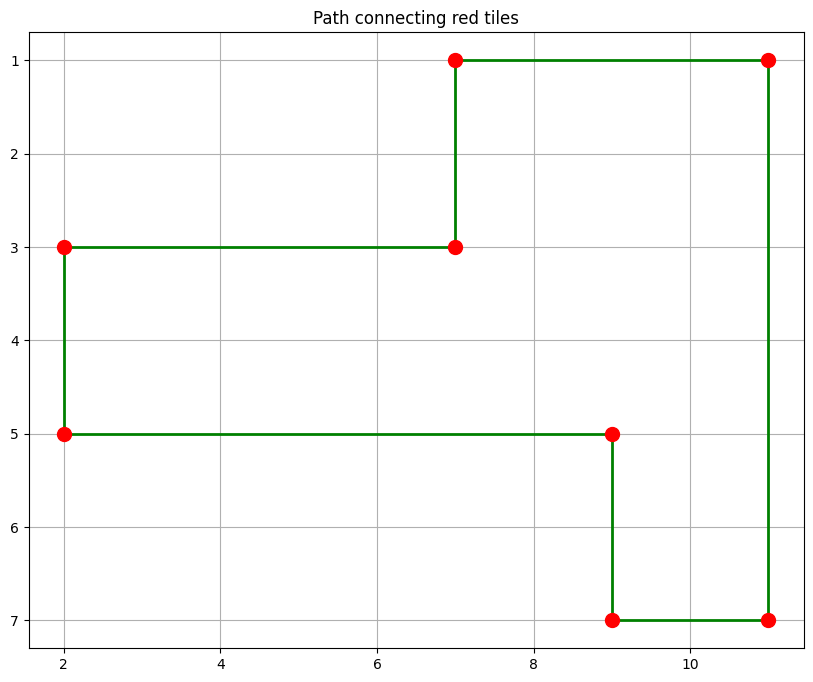

In [ ]:
import matplotlib.pyplot as plt

def draw(inp):
    ps = parse(inp)
    # Close the loop by adding first point at the end
    pts = list(ps) + [ps[0]]
    xs, ys = zip(*pts)

    plt.figure(figsize=(10, 8))
    plt.plot(xs, ys, 'g-', linewidth=2)  # green lines
    plt.plot(*zip(*ps), 'ro', markersize=10)  # red points
    plt.gca().invert_yaxis()  # flip y so it matches the problem's grid orientation
    plt.grid(True)
    plt.title("Path connecting red tiles")
    plt.show()
draw(samp)

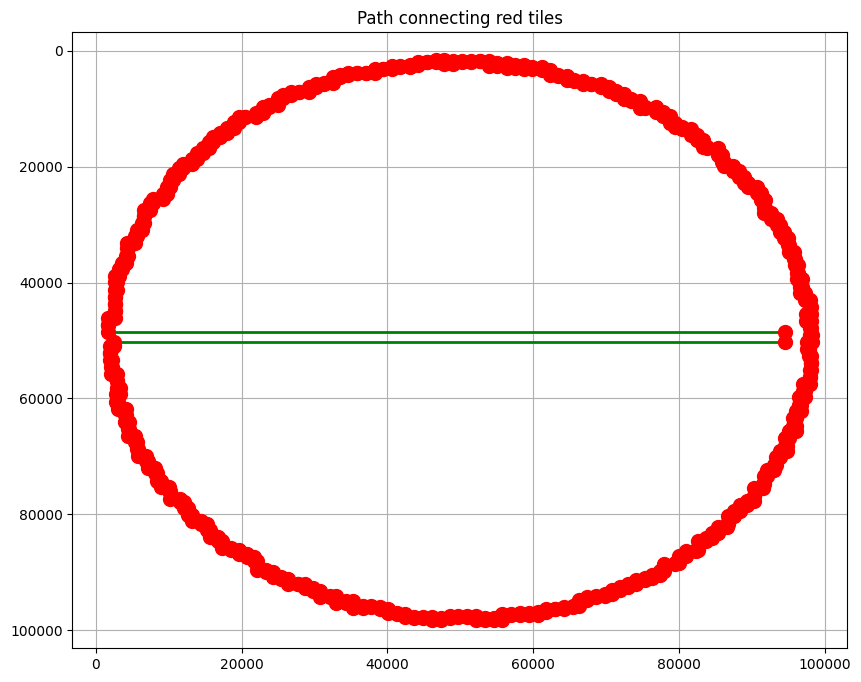

In [ ]:
draw(inp)

This is interesting! Let's "zoom-in" to the area in the middle of the circle and visualize it.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You can add `plt.xlim()` and `plt.ylim()` to zoom in. Looking at the plot, the interesting area seems to be around x: 0-100000 and y: 45000-55000. Try something like:

```python
plt.xlim(0, 100000)
plt.ylim(55000, 45000)  # reversed since y-axis is inverted
```

Add those lines before `plt.show()` in your `draw` function, or just make a quick modified version. Adjust the ranges as needed to find the interesting part!

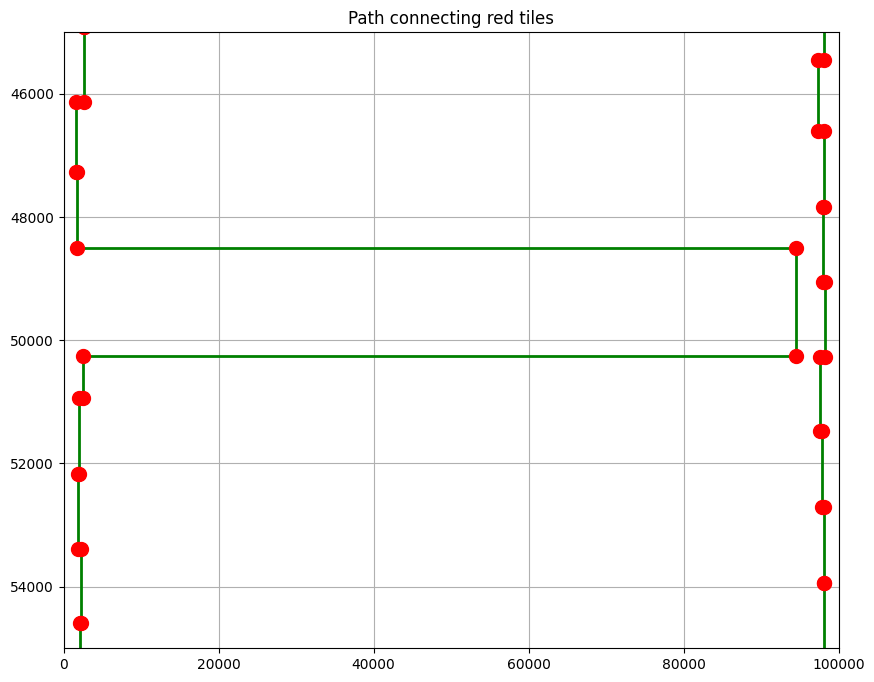

In [ ]:
ps = parse(inp)
# Close the loop by adding first point at the end
pts = list(ps) + [ps[0]]
xs, ys = zip(*pts)

plt.figure(figsize=(10, 8))
plt.plot(xs, ys, 'g-', linewidth=2)  # green lines
plt.plot(*zip(*ps), 'ro', markersize=10)  # red points
plt.gca().invert_yaxis()  # flip y so it matches the problem's grid orientation
plt.grid(True)
plt.title("Path connecting red tiles")


plt.xlim(0, 100000)
plt.ylim(55000, 45000)  # reversed since y-axis is inverted
plt.show()

Here's my idea:
Let's assume that one of the red tiles used to achnor the area is on the right. For the upper half of the circle, this would be its bottom right corner. Then, let's check all the points in the upper half of the circle, if they form a valid solution (no point inside of the area).
Let's all the valid solutions from the top half and then also from the bottom half of the circle. Then, we can easily find their maximum.
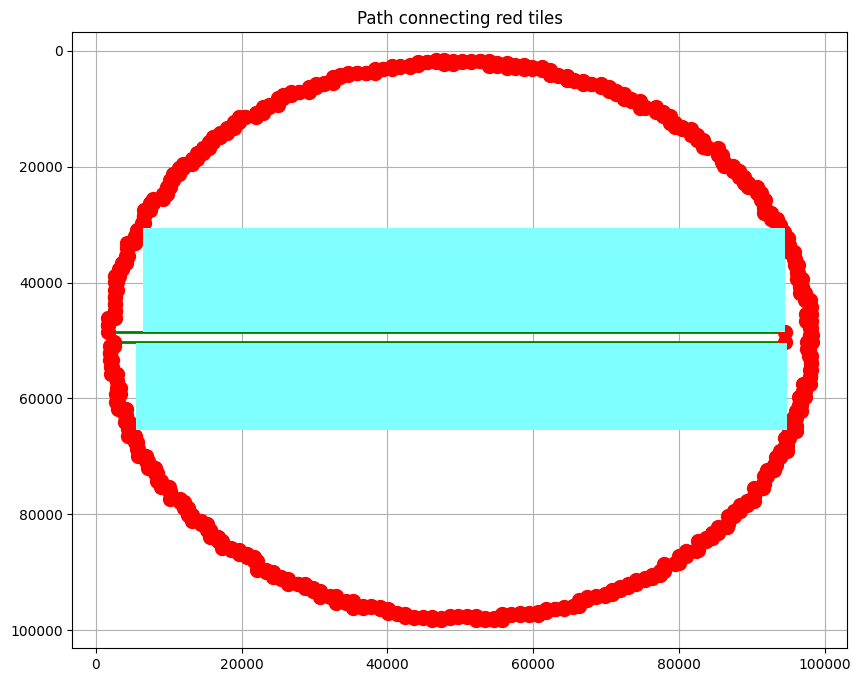

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

That's a clever approach! Breaking the loop into upper and lower halves simplifies the problem significantly.

A key insight: if you're iterating along one half (say upper), and you pick two red points as opposite corners, you need to ensure all the points *between* them on the path stay outside the rectangle. Since the path is monotonic on each half (moving consistently left-to-right or right-to-left), you can check this efficiently.

One thing to clarify: how will you determine which points are in the "upper" vs "lower" half? Are you thinking of splitting at the leftmost and rightmost points of the loop?

Yes, I'll filter the points to be checked by the coordinates of the points on the outing from the right.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

That makes sense! So for each candidate anchor point on the right, you'll filter to only consider points whose coordinates would form a valid rectangle (no path points inside).

Go ahead and try implementing it — start with finding the rightmost point to split the loop into upper and lower halves, then iterate from there.

In [ ]:
L(ps, ps[1:]).zip().enumerate()[:5]

[(0, ((97579, 50266), (97579, 51480))), (1, ((97579, 51480), (97846, 51480))), (2, ((97846, 51480), (97846, 52706))), (3, ((97846, 52706), (98052, 52706))), (4, ((98052, 52706), (98052, 53936)))]

In [ ]:
def get_long_line(idx, line):
    src, tgt = line
    src_x, src_y = src
    tgt_x, tgt_y = tgt
    return abs(tgt_x - src_x) > 40_000
L(ps, ps[1:]).zip().enumerate().filter(lambda x: get_long_line(x[0], x[1]))

[(247, ((2448, 50249), (94532, 50249))), (249, ((94532, 48504), (1681, 48504)))]

Ok, the cordinates of the points on the right are `(94532, 48504)` (top half) and `(94532, 50249)` (bottom half).

In [ ]:
top_half_points = ps.filter(lambda p: p[1] <= 48504)
bottom_half_points = ps.filter(lambda p: p[1] >= 50249)
len(top_half_points), len(bottom_half_points)

(244, 250)

Let's write the function checking if for 2 red tiles there are any red tiles strictly inside the area.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good! Now for the checking function. Think about what "strictly inside" means for a rectangle.

Given two red tiles forming opposite corners, a point `(px, py)` is strictly inside if:
- Its x-coordinate is strictly between the two corner x-coordinates
- Its y-coordinate is strictly between the two corner y-coordinates

Try writing a function `has_red_inside(c1, c2, points)` that returns `True` if any point from `points` is strictly inside the rectangle formed by `c1` and `c2`.

What would the conditions look like?

In [ ]:
def no_red_inside(c1, c2, points):
    x1, y1 = c1
    x2, y2 = c2
    min_x, max_x = min(x1, x2), max(x1, x2)
    min_y, max_y = min(y1, y2), max(y1, y2)
    return not any(min_x < p[0] < max_x and min_y < p[1] < max_y for p in points)
no_red_inside((20_000, 20_000), (40_000, 40_000), ps), no_red_inside((0, 0), (40_000, 40_000), ps)

(True, False)

In [ ]:
L(top_half_points , [(94532, 48504)]).zip(cycled=True)[:10]

[((94532, 48504), (94532, 48504)), ((1681, 48504), (94532, 48504)), ((1681, 47275), (94532, 48504)), ((1624, 47275), (94532, 48504)), ((1624, 46125), (94532, 48504)), ((2619, 46125), (94532, 48504)), ((2619, 44916), (94532, 48504)), ((2641, 44916), (94532, 48504)), ((2641, 43701), (94532, 48504)), ((2658, 43701), (94532, 48504))]

In [ ]:
top_valid = L(top_half_points, [(94532, 48504)]).zip(cycled=True).filter(lambda t: no_red_inside(*t, top_half_points))
top_valid

In [ ]:
bottom_valid = L(bottom_half_points , [(94532, 50249)]).zip(cycled=True).filter(lambda t: no_red_inside(*t, bottom_half_points))
bottom_valid

In [ ]:
max(L(top_valid + bottom_valid).starmap(area))